In [1]:
import onnxruntime
import cv2
from itertools import chain
from PIL import Image


In [5]:
model=onnxruntime.InferenceSession('models/buffalo_l_with_size_adjust_640.onnx')


In [6]:
img = cv2.imread("example.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = 640
if resize is not None:
    img = cv2.resize(img, (resize, resize))
outputs = sorted([x.name for x in model.get_outputs()])
bboxes, keypoints, scores = model.run(outputs, {"image": img})


for bbox in bboxes.astype("int"):
    img = cv2.rectangle(img, tuple(bbox[:2]), tuple(bbox[2:]), (255, 255, 255))

for kp in chain.from_iterable(keypoints.astype("int")):
    img = cv2.circle(img, kp, 10, (255, 255, 255))


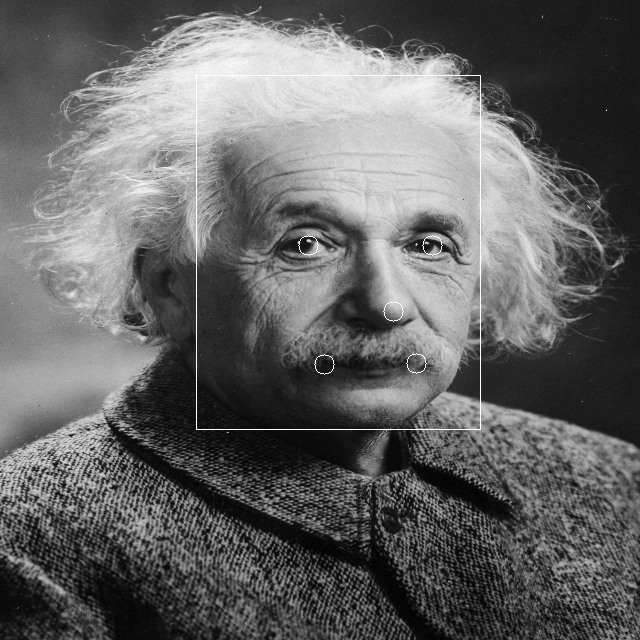

In [7]:
Image.fromarray(img)
